In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

In [3]:
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('data_split')

In [6]:
data

,Unnamed: 0,Variable_1,Variable_2,Variable_3,Variable_4,Variable_6,Variable_7,Variable_8,Variable_9,Variable_10,...,Variable_35,Variable_36,Variable_37,Variable_39,Variable_40,Variable_41,Target,Variable_5,Variable_14,Variable_45
0,0,35.0,1.0,1.0,1.0,72.0,27.0,100.0,190.0,100.0,...,0.0,0.0,17550.5,699.0,0.0,0.0,1.0,0,11.0,1
1,1,30.0,1.0,1.0,1.0,25.0,26.0,199.0,199.0,199.0,...,0.0,0.0,40147.0,100.0,0.0,0.0,1.0,0,11.0,2
2,2,30.0,1.0,1.0,1.0,65.0,21.0,100.0,100.0,100.0,...,0.0,0.0,499.0,300.0,0.0,0.0,0.0,0,6.0,1
3,3,30.0,1.0,1.0,1.0,65.0,48.0,199.0,199.0,199.0,...,0.0,0.0,17550.5,699.0,0.0,0.0,1.0,0,3.0,1
4,4,30.0,2.0,1.0,1.0,4.0,28.0,199.0,600.0,199.0,...,0.0,0.0,17550.5,699.0,0.0,0.0,1.0,0,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2052,2052,30.0,1.0,1.0,1.0,54.0,23.0,199.0,120.0,120.0,...,0.0,0.0,1083.0,699.0,0.0,0.0,1.0,0,5.0,2
2053,2053,30.0,2.0,1.0,1.0,66.0,46.0,300.0,199.0,199.0,...,0.0,0.0,24566.0,699.0,1.0,1.0,1.0,0,6.0,1
2054,2054,30.0,1.0,1.0,1.0,22.0,20.0,199.0,199.0,199.0,...,0.0,0.0,278.0,699.0,0.0,0.0,1.0,0,6.0,1
2055,2055,60.0,1.0,1.0,1.0,76.0,47.0,100.0,500.0,300.0,...,0.0,0.0,17550.5,699.0,0.0,0.0,1.0,0,6.0,1


In [7]:
data.describe()

,Unnamed: 0,Variable_1,Variable_2,Variable_3,Variable_4,Variable_6,Variable_7,Variable_8,Variable_9,Variable_10,...,Variable_35,Variable_36,Variable_37,Variable_39,Variable_40,Variable_41,Target,Variable_5,Variable_14,Variable_45
count,2057.000000,2057.000000,2057.00000,2057.0,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,...,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.0,2057.000000,2057.000000
mean,1028.000000,33.634905,1.31016,1.0,1.000972,48.887701,32.386485,197.083617,233.929509,202.875061,...,0.081672,0.024307,26249.564171,1620.703938,0.180846,0.003889,0.692270,0.0,6.669908,1.640253
std,593.949072,8.894507,0.72481,0.0,0.031174,26.047389,11.470563,109.459238,116.485196,80.494015,...,0.408017,0.154039,31525.141660,4912.831795,0.444774,0.062257,0.461666,0.0,2.670351,0.487084
min,0.000000,7.000000,1.00000,1.0,1.000000,1.000000,18.000000,0.000000,50.000000,50.000000,...,0.000000,0.000000,100.000000,100.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,514.000000,30.000000,1.00000,1.0,1.000000,27.000000,24.000000,100.000000,199.000000,190.000000,...,0.000000,0.000000,13602.000000,699.000000,0.000000,0.000000,0.000000,0.0,5.000000,1.000000
50%,1028.000000,30.000000,1.00000,1.0,1.000000,49.000000,29.000000,199.000000,199.000000,199.000000,...,0.000000,0.000000,17550.500000,699.000000,0.000000,0.000000,1.000000,0.0,7.000000,2.000000
75%,1542.000000,30.000000,1.00000,1.0,1.000000,69.000000,38.000000,199.000000,300.000000,200.000000,...,0.000000,0.000000,23309.000000,699.000000,0.000000,0.000000,1.000000,0.0,8.000000,2.000000
max,2056.000000,60.000000,10.00000,1.0,2.000000,99.000000,86.000000,500.000000,600.000000,500.000000,...,8.000000,1.000000,467048.000000,76541.000000,4.000000,1.000000,1.000000,0.0,11.000000,2.000000


In [8]:
X=data.drop('Target', axis=1)
y=data['Target']

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [10]:
bestfeatures = SelectKBest(score_func=chi2, k=15)
fit = bestfeatures.fit(X,y)

In [11]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [12]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [15]:
a=(featureScores.nlargest(15,'Score'))

In [14]:
a

,Specs,Score
33,Variable_37,726809.746689
34,Variable_39,181394.175244
17,Variable_20,145549.404973
18,Variable_22,118949.654129
7,Variable_8,1429.713519
11,Variable_12,384.036439
9,Variable_10,251.544406
10,Variable_11,251.544406
13,Variable_16,146.615614
6,Variable_7,145.835792


In [16]:
b=[i for i in a['Specs']]

In [66]:
df=X[b]

In [67]:
df

,Variable_37,Variable_39,Variable_20,Variable_22,Variable_8,Variable_12,Variable_10,Variable_11,Variable_16,Variable_7,Variable_27,Variable_19,Variable_15,Variable_9,Variable_18
0,17550.5,699.0,11000.0,460.0,100.0,15.0,100.0,100.0,0.0,27.0,1.0,1.0,0.0,190.0,0.0
1,40147.0,100.0,25000.0,100.0,199.0,15.0,199.0,199.0,1.0,26.0,4.0,0.0,4.0,199.0,0.0
2,499.0,300.0,499.0,200.0,100.0,15.0,100.0,100.0,2.0,21.0,0.0,0.0,1.0,100.0,0.0
3,17550.5,699.0,11000.0,460.0,199.0,15.0,199.0,199.0,0.0,48.0,0.0,0.0,0.0,199.0,0.0
4,17550.5,699.0,11000.0,460.0,199.0,15.0,199.0,199.0,0.0,28.0,1.0,0.0,1.0,600.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2052,1083.0,699.0,1083.0,460.0,199.0,45.0,120.0,120.0,0.0,23.0,0.0,0.0,1.0,120.0,0.0
2053,24566.0,699.0,12506.0,460.0,300.0,45.0,199.0,199.0,0.0,46.0,2.0,2.0,2.0,199.0,1.0
2054,278.0,699.0,278.0,460.0,199.0,45.0,199.0,199.0,0.0,20.0,0.0,1.0,1.0,199.0,0.0
2055,17550.5,699.0,11000.0,460.0,100.0,99.0,300.0,300.0,0.0,47.0,1.0,0.0,1.0,500.0,0.0


In [68]:
df.describe()

,Variable_37,Variable_39,Variable_20,Variable_22,Variable_8,Variable_12,Variable_10,Variable_11,Variable_16,Variable_7,Variable_27,Variable_19,Variable_15,Variable_9,Variable_18
count,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000
mean,26249.564171,1620.703938,13193.142440,1058.700535,197.083617,36.929023,202.875061,202.875061,1.120564,32.386485,1.846378,0.403500,2.107924,233.929509,0.542052
std,31525.141660,4912.831795,10490.325471,4006.731616,109.459238,28.130961,80.494015,80.494015,2.922649,11.470563,3.284904,0.906927,2.603877,116.485196,0.847465
min,100.000000,100.000000,100.000000,100.000000,0.000000,0.000000,50.000000,50.000000,0.000000,18.000000,0.000000,0.000000,0.000000,50.000000,0.000000
25%,13602.000000,699.000000,9205.000000,460.000000,100.000000,15.000000,190.000000,190.000000,0.000000,24.000000,0.000000,0.000000,0.000000,199.000000,0.000000
50%,17550.500000,699.000000,11000.000000,460.000000,199.000000,45.000000,199.000000,199.000000,0.000000,29.000000,1.000000,0.000000,1.000000,199.000000,0.000000
75%,23309.000000,699.000000,13378.000000,460.000000,199.000000,45.000000,200.000000,200.000000,1.000000,38.000000,2.000000,0.000000,3.000000,300.000000,1.000000
max,467048.000000,76541.000000,78398.000000,76000.000000,500.000000,99.000000,500.000000,500.000000,32.000000,86.000000,32.000000,7.000000,20.000000,600.000000,7.000000


<AxesSubplot:ylabel='Density'>

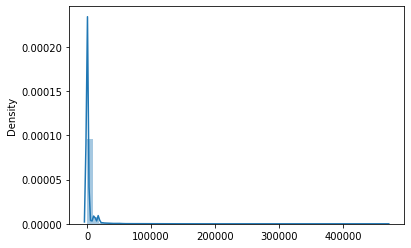

In [41]:
sns.distplot(df.dropna())

In [69]:
def plot(df,col):
    plt.figure(figsize=(16,4))
    #box
    plt.subplot(1,2,1)
    sns.boxplot(df[col])
    #hist
    plt.subplot(1,2,2)
    plt.hist(df[col], alpha=0.5)
    
    plt.show()

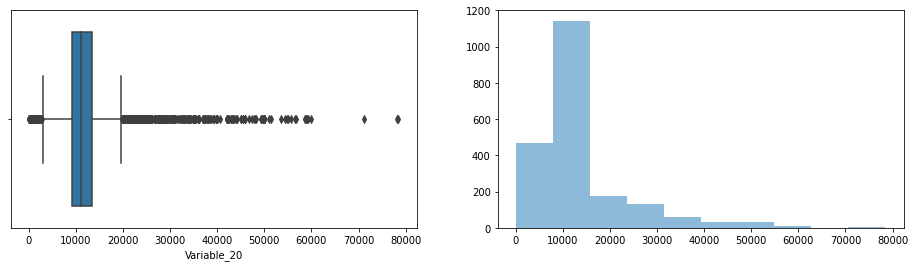

In [70]:
plot(df,'Variable_20')

In [72]:
features=df.columns

In [74]:
import scipy.stats as stats

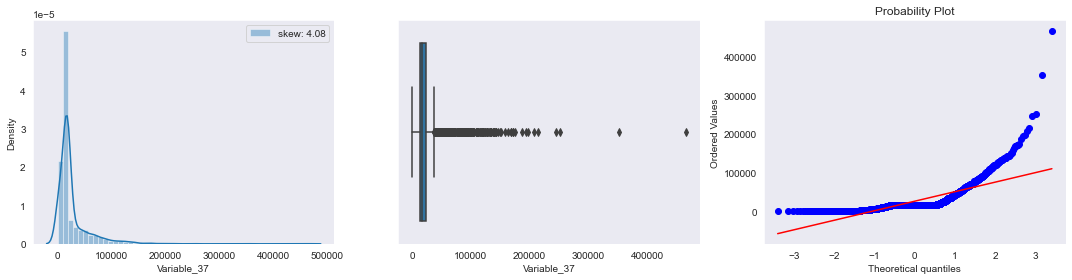

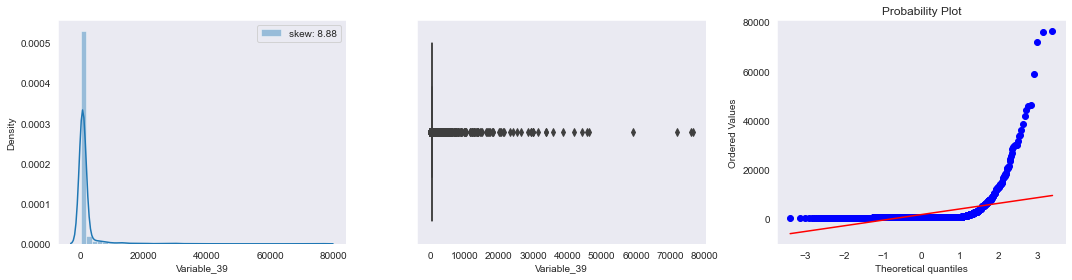

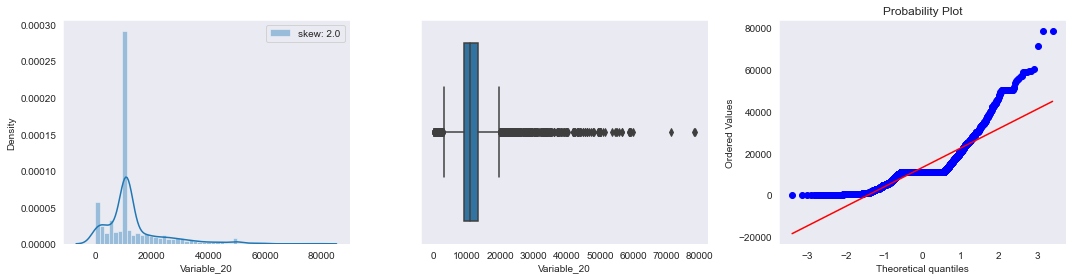

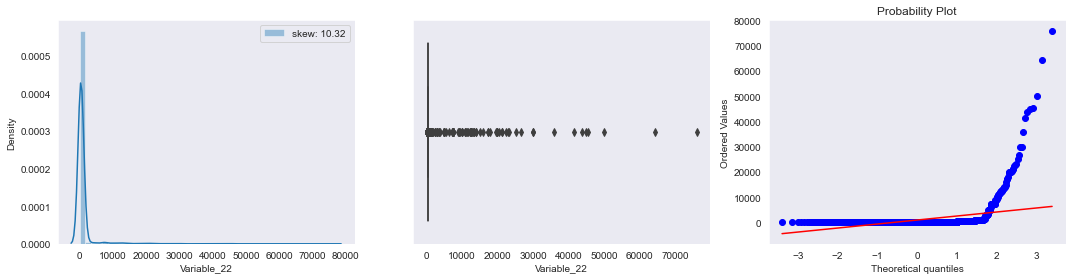

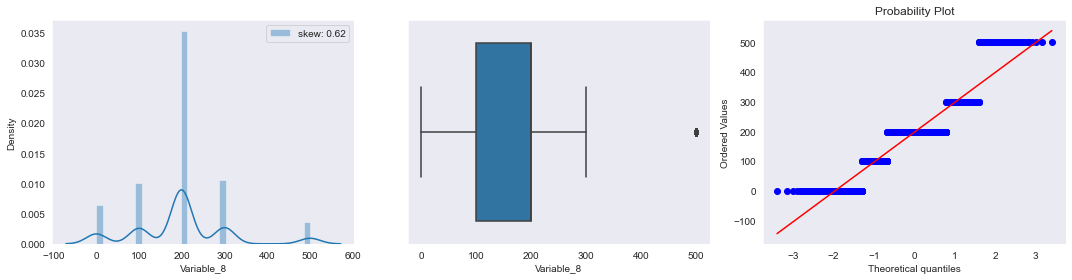

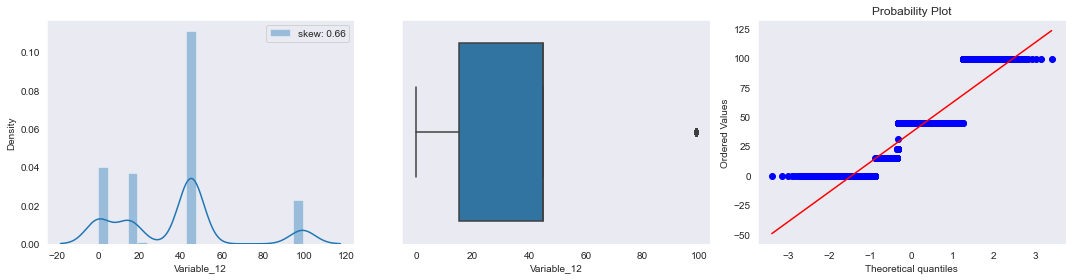

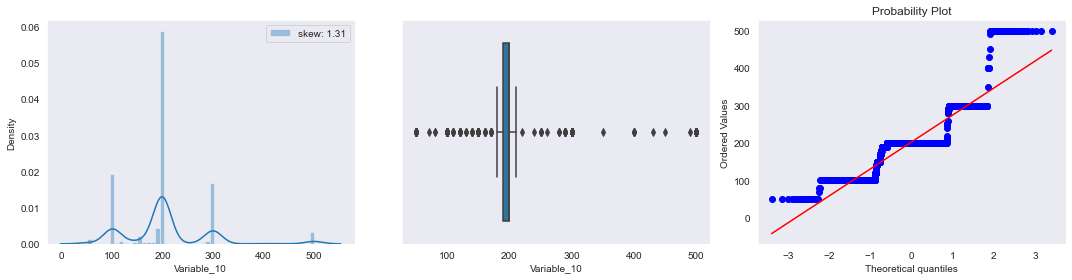

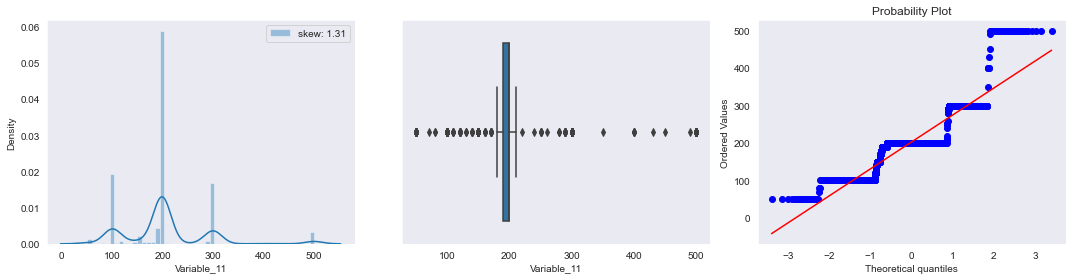

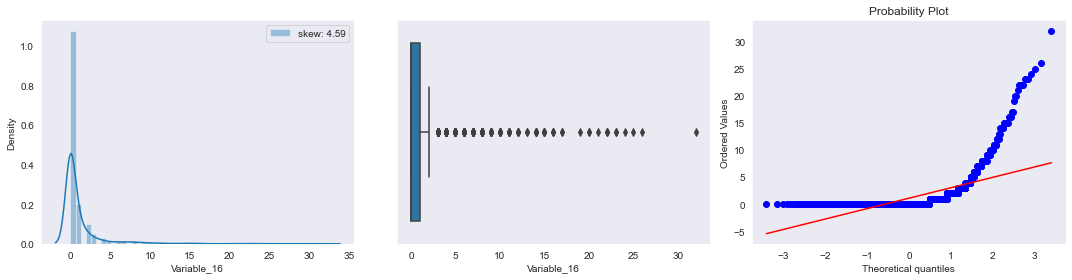

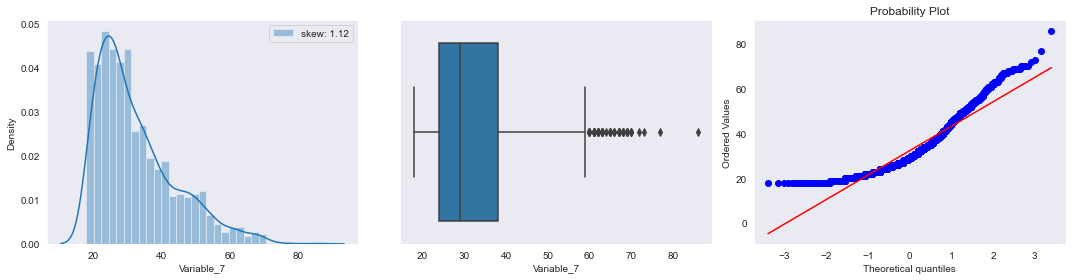

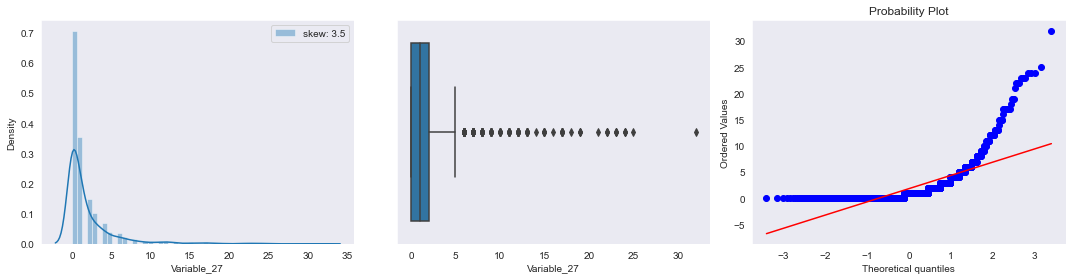

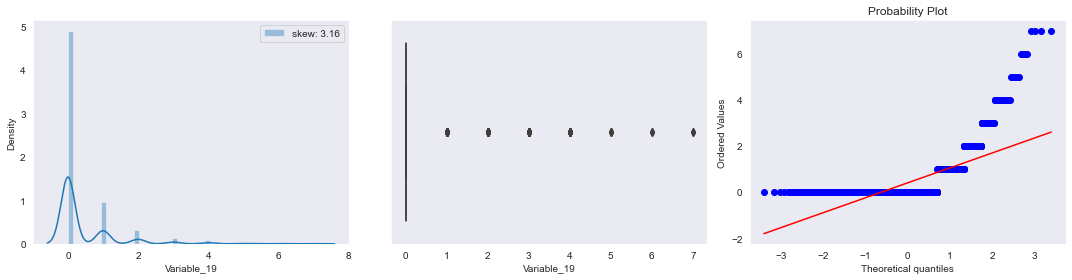

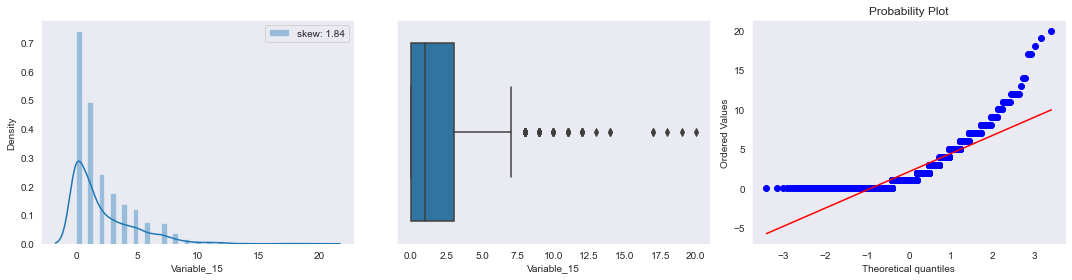

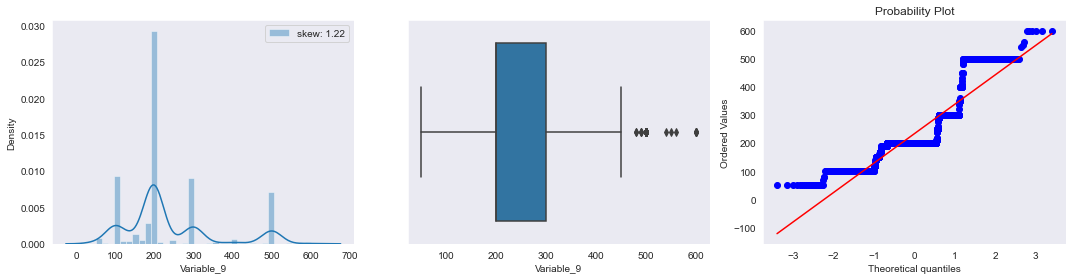

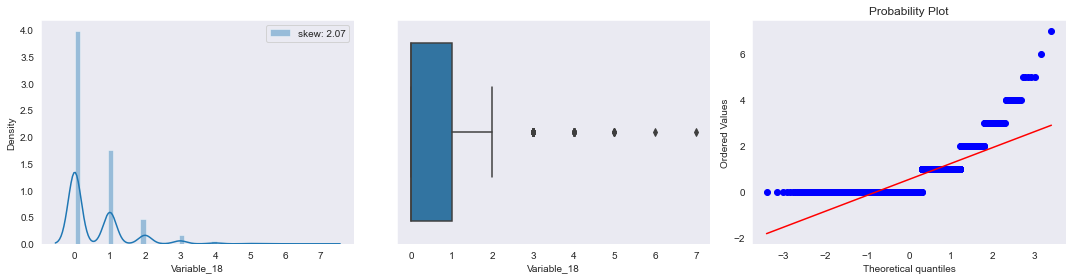

In [75]:
sns.set_style('dark')
for col in features:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    stats.probplot(df[col], plot=plt)
    plt.tight_layout()
    plt.show()

In [76]:
df_cap = df.copy()

In [77]:
def iqr_capping(df, cols, factor):
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df[col] = np.where(df[col]>upper_whisker, upper_whisker,
                 np.where(df[col]<lower_whisker, lower_whisker, df[col]))

In [78]:
iqr_capping(df_cap, features, 1.5)

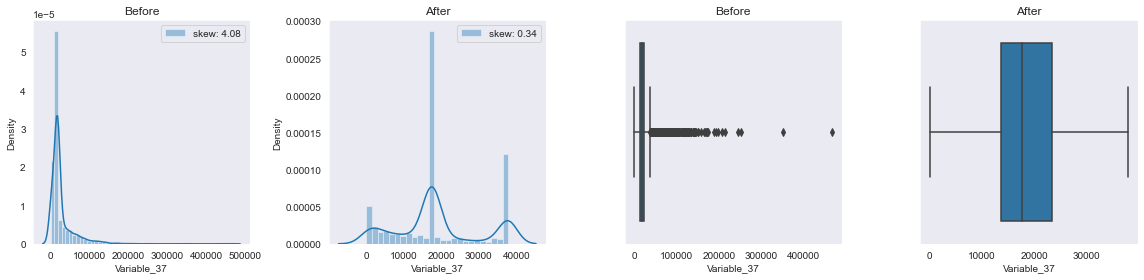

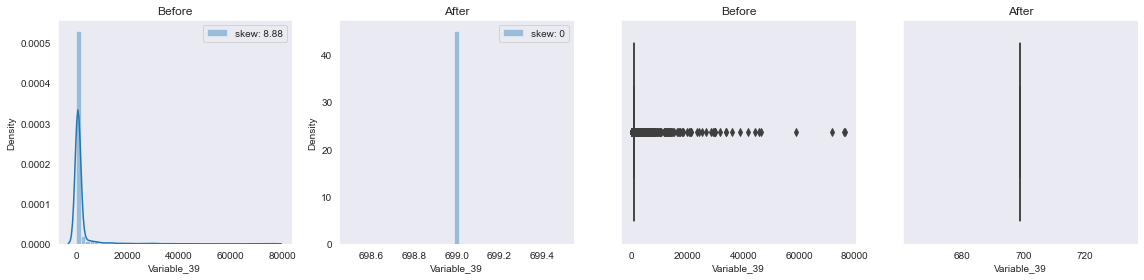

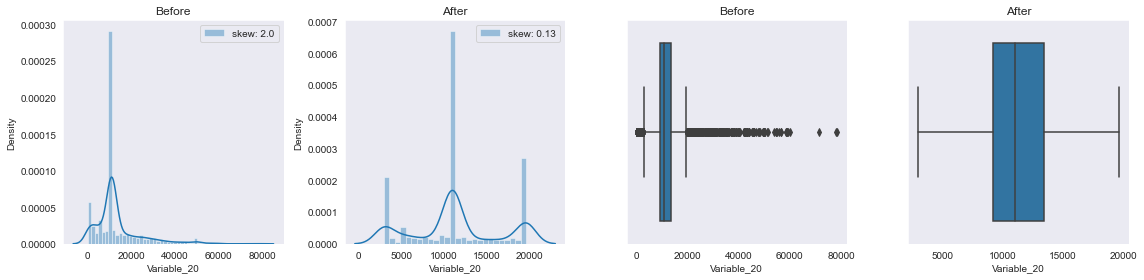

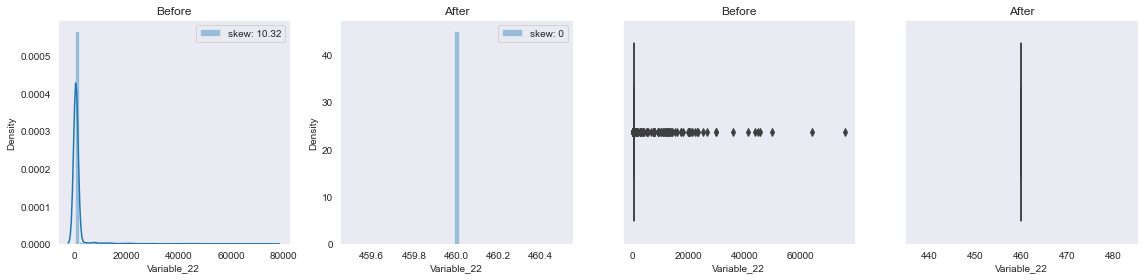

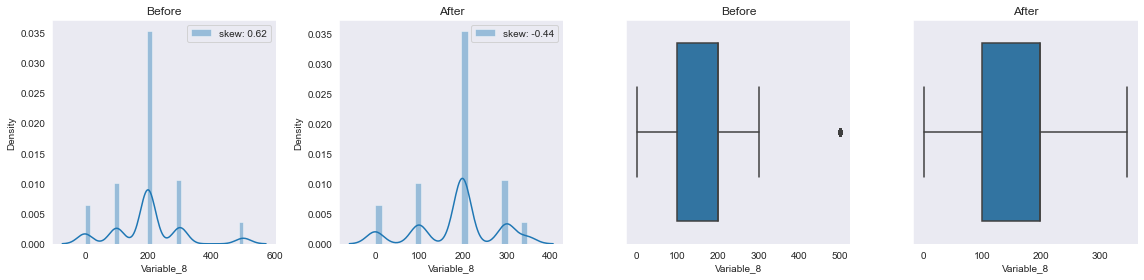

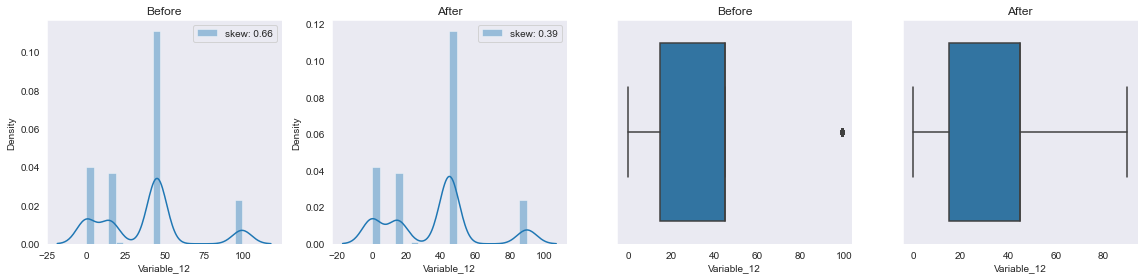

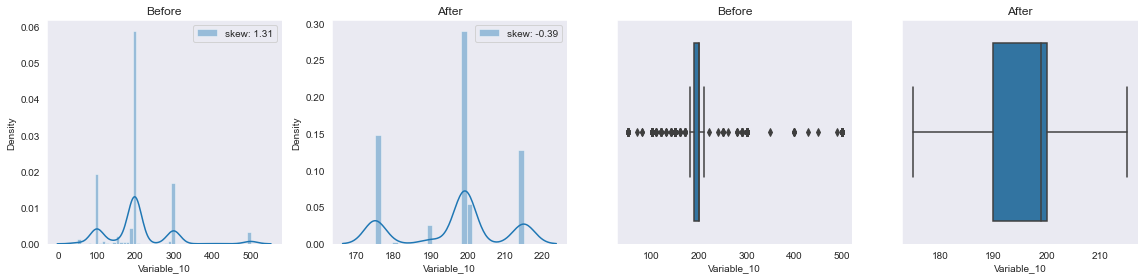

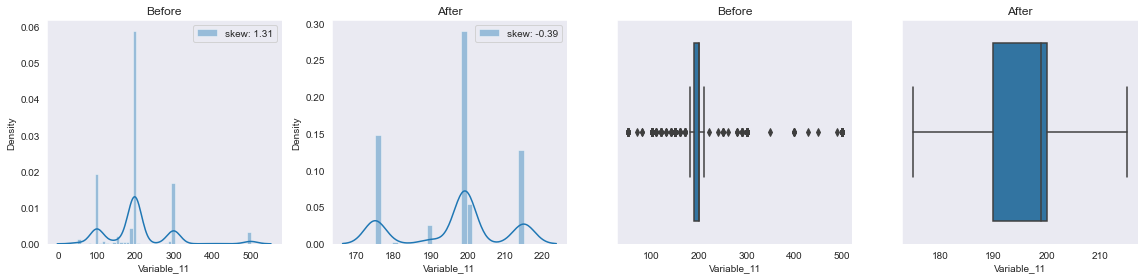

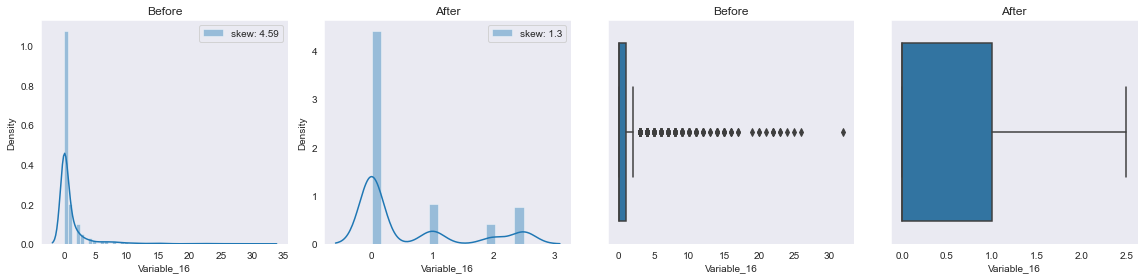

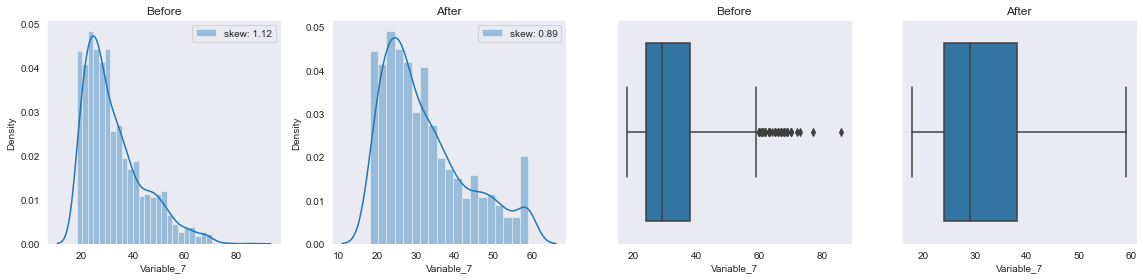

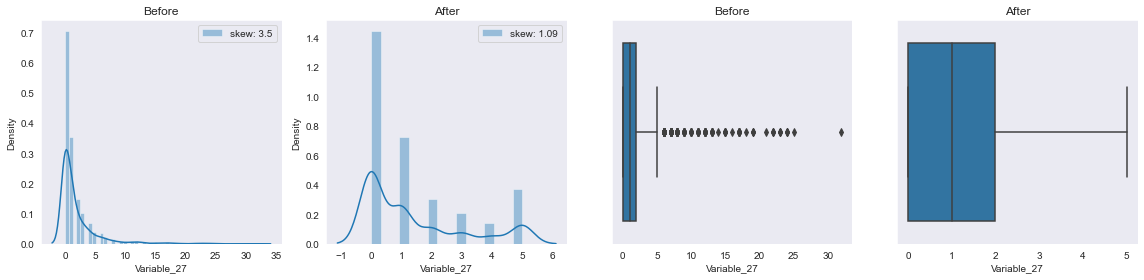

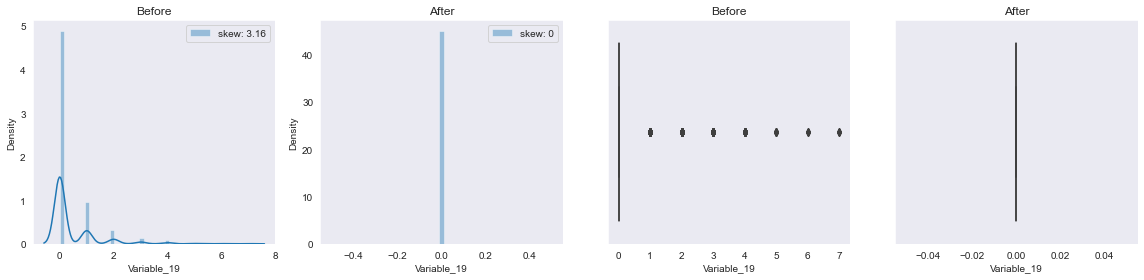

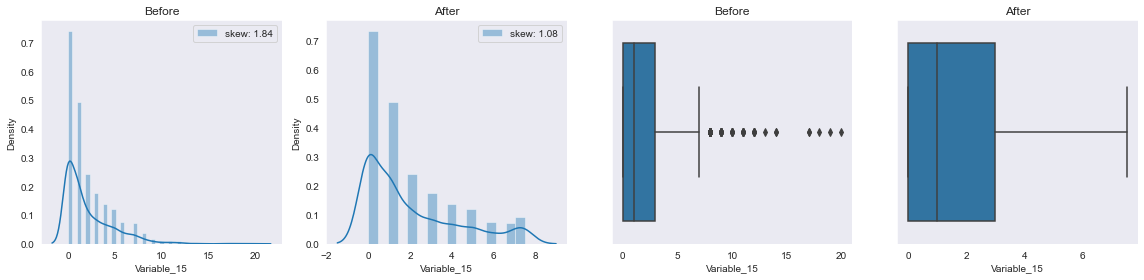

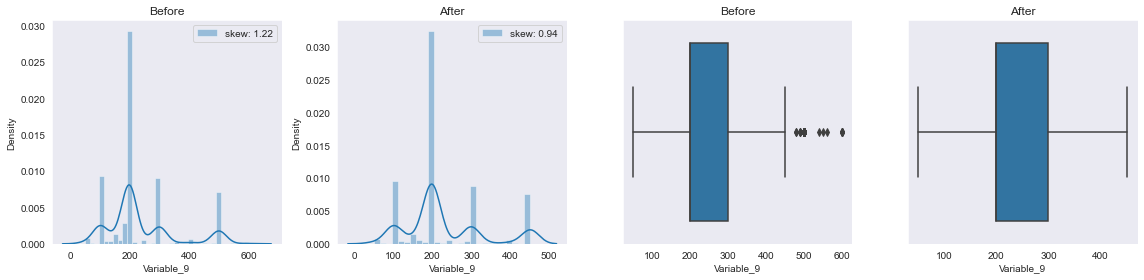

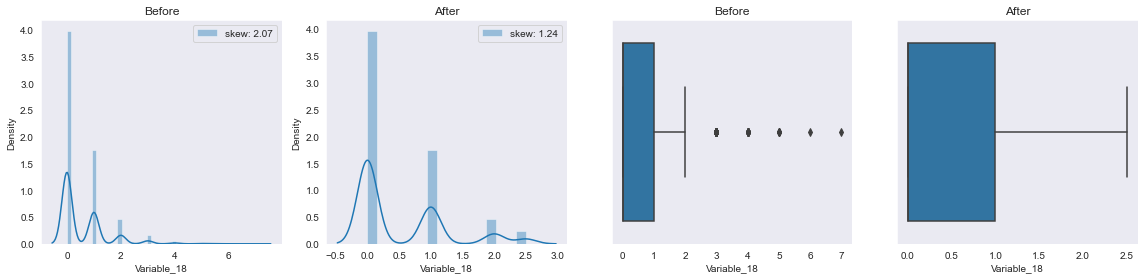

In [79]:
for col in features:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(df_cap[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [35]:
data = sc.fit_transform(data)

In [38]:
data

array([[-1.73120898,  0.15351347, -0.42802388, ...,  0.        ,
         1.62193885, -1.31478121],
       [-1.72952493, -0.40876789, -0.42802388, ...,  0.        ,
         1.62193885,  0.7387533 ],
       [-1.72784087, -0.40876789, -0.42802388, ...,  0.        ,
        -0.2509298 , -1.31478121],
       ...,
       [ 1.72784087, -0.40876789, -0.42802388, ...,  0.        ,
        -0.2509298 , -1.31478121],
       [ 1.72952493,  2.96492029, -0.42802388, ...,  0.        ,
        -0.2509298 , -1.31478121],
       [ 1.73120898, -0.40876789, -0.42802388, ...,  0.        ,
         1.62193885,  0.7387533 ]])

In [80]:
df_cap

,Variable_37,Variable_39,Variable_20,Variable_22,Variable_8,Variable_12,Variable_10,Variable_11,Variable_16,Variable_7,Variable_27,Variable_19,Variable_15,Variable_9,Variable_18
0,17550.5,699.0,11000.0,460.0,100.0,15.0,175.0,175.0,0.0,27.0,1.0,0.0,0.0,190.0,0.0
1,37869.5,699.0,19637.5,460.0,199.0,15.0,199.0,199.0,1.0,26.0,4.0,0.0,4.0,199.0,0.0
2,499.0,699.0,2945.5,460.0,100.0,15.0,175.0,175.0,2.0,21.0,0.0,0.0,1.0,100.0,0.0
3,17550.5,699.0,11000.0,460.0,199.0,15.0,199.0,199.0,0.0,48.0,0.0,0.0,0.0,199.0,0.0
4,17550.5,699.0,11000.0,460.0,199.0,15.0,199.0,199.0,0.0,28.0,1.0,0.0,1.0,451.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2052,1083.0,699.0,2945.5,460.0,199.0,45.0,175.0,175.0,0.0,23.0,0.0,0.0,1.0,120.0,0.0
2053,24566.0,699.0,12506.0,460.0,300.0,45.0,199.0,199.0,0.0,46.0,2.0,0.0,2.0,199.0,1.0
2054,278.0,699.0,2945.5,460.0,199.0,45.0,199.0,199.0,0.0,20.0,0.0,0.0,1.0,199.0,0.0
2055,17550.5,699.0,11000.0,460.0,100.0,90.0,215.0,215.0,0.0,47.0,1.0,0.0,1.0,451.5,0.0


data.isnull().sum().sort_values(ascending=False)

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_cap, y, test_size=0.15, random_state=True)

<AxesSubplot:xlabel='Target', ylabel='count'>

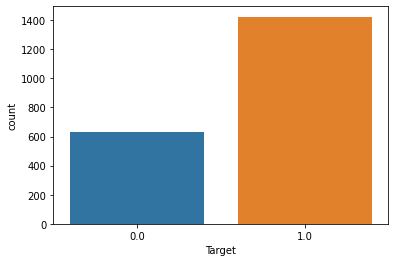

In [31]:
sns.countplot(y)

In [91]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [92]:
import lightgbm as lgb

In [93]:
class_weight=dict({0:140,1:68})

In [94]:
model = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=class_weight, colsample_bytree=0.9,
               importance_type='split', learning_rate=0.15, max_depth=3,
               min_child_samples=30, min_child_weight=22, min_split_gain=0.2,
               n_estimators=50, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.1, reg_lambda=0.1, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=30,eval_metric='logloss')

[30]	training's binary_logloss: 0.601332	valid_0's binary_logloss: 0.628083


LGBMClassifier(class_weight={0: 140, 1: 68}, colsample_bytree=0.9,
               learning_rate=0.15, max_depth=3, min_child_samples=30,
               min_child_weight=22, min_split_gain=0.2, n_estimators=50,
               reg_alpha=0.1, reg_lambda=0.1, silent=True)

In [95]:
print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))

Training accuracy 0.6676
Testing accuracy 0.6343


In [96]:
y2=model.predict_proba(X_test)[:,1]
s2=roc_auc_score(y_test,y2)

In [97]:
s2

0.6676455566905005

In [98]:
#under sampling
from imblearn.under_sampling import RandomUnderSampler  

under_sampler = RandomUnderSampler()
X_res, y_res = under_sampler.fit_resample(X_train,y_train)

In [99]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_res,y_res)

RandomForestClassifier()

In [100]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 57  32]
 [ 83 137]]
0.627831715210356
              precision    recall  f1-score   support

         0.0       0.41      0.64      0.50        89
         1.0       0.81      0.62      0.70       220

    accuracy                           0.63       309
   macro avg       0.61      0.63      0.60       309
weighted avg       0.69      0.63      0.64       309



In [103]:
model = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.9,
               importance_type='split', learning_rate=0.15, max_depth=3,
               min_child_samples=30, min_child_weight=22, min_split_gain=0.2,
               n_estimators=50, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.1, reg_lambda=0.1, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
model.fit(X_res,y_res,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=30,eval_metric='logloss')

[30]	valid_0's binary_logloss: 0.647674	valid_1's binary_logloss: 0.639167


LGBMClassifier(colsample_bytree=0.9, learning_rate=0.15, max_depth=3,
               min_child_samples=30, min_child_weight=22, min_split_gain=0.2,
               n_estimators=50, reg_alpha=0.1, reg_lambda=0.1, silent=True)

In [104]:
print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))

Training accuracy 0.6247
Testing accuracy 0.6084


In [106]:
y2=model.predict_proba(X_test)[:,1]
s2=roc_auc_score(y_test,y2)
s2

0.6583758937691522

Over sampling

In [109]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [110]:
os=RandomOverSampler(0.75)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({1.0: 1204, 0.0: 544})
The number of classes after fit Counter({1.0: 1204, 0.0: 903})


In [111]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [112]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 33  56]
 [ 35 185]]
0.7055016181229773
              precision    recall  f1-score   support

         0.0       0.49      0.37      0.42        89
         1.0       0.77      0.84      0.80       220

    accuracy                           0.71       309
   macro avg       0.63      0.61      0.61       309
weighted avg       0.69      0.71      0.69       309



In [113]:
y_prob=classifier.predict_proba(X_test)[:,1]
s=roc_auc_score(y_test,y_prob)
s

0.6599336057201226

In [354]:
model = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.9,
               importance_type='split', learning_rate=0.3567, max_depth=3,
               min_child_samples=20, min_child_weight=3, min_split_gain=1,
               n_estimators=12, n_jobs=-2, num_leaves=30, objective=None,
               random_state=None, reg_alpha=0.1, reg_lambda=0.1, silent=True,
               subsample=0.9, subsample_for_bin=200000, subsample_freq=0)
model.fit(X_train_ns,y_train_ns,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=30,eval_metric='logloss')

LGBMClassifier(colsample_bytree=0.9, learning_rate=0.3567, max_depth=3,
               min_child_weight=3, min_split_gain=1, n_estimators=12, n_jobs=-2,
               num_leaves=30, reg_alpha=0.1, reg_lambda=0.1, silent=True,
               subsample=0.9)

In [355]:
print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))
y2=model.predict_proba(X_test)[:,1]
s2=roc_auc_score(y_test,y2)
s2

Training accuracy 0.6865
Testing accuracy 0.6990


0.7007150153217568

In [356]:
y2=model.predict(X_test)
print(confusion_matrix(y_test,y2))
print(accuracy_score(y_test,y2))
print(classification_report(y_test,y2))

[[ 47  42]
 [ 51 169]]
0.6990291262135923
              precision    recall  f1-score   support

         0.0       0.48      0.53      0.50        89
         1.0       0.80      0.77      0.78       220

    accuracy                           0.70       309
   macro avg       0.64      0.65      0.64       309
weighted avg       0.71      0.70      0.70       309



In [357]:
y2

array([1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 0.